# Preprocessed Data

In [140]:
# retrieve the preprocessed data from previous notebook

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r Y
%store -r le

In [141]:
x_train.shape

(6985, 40, 174)

In [142]:
num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

# Ensemble training

Ensemble models in machine learning operates by combining the decisions from multiple models to improve the overall performance. Here we are considering 4 models:

- CNN
- CRNN
- Paralllel CNN
- Parallel CRNN

In [143]:
#Loading saved models

from keras.models import load_model
import numpy as np

model1 = load_model('saved_models/weights.best.basic_cnn.hdf5')
model2 = load_model('saved_models/weights.best.basic_crnn.hdf5')
model3 = load_model('saved_models/weights.best.basic_pcnn.hdf5')
model4 = load_model('saved_models/weights.best.basic_pcrnn.hdf5')

models = [model1, model2, model3, model4]

## CNN Prediction

In [144]:
predicted_vector = model1.predict_classes(x_test)
predicted_class = le.inverse_transform(predicted_vector) 
for i in range(10):
    print("The predicted class is:", predicted_class[i], '\n')

The predicted class is: jackhammer 

The predicted class is: street_music 

The predicted class is: drilling 

The predicted class is: siren 

The predicted class is: dog_bark 

The predicted class is: jackhammer 

The predicted class is: children_playing 

The predicted class is: dog_bark 

The predicted class is: drilling 

The predicted class is: dog_bark 



## CRNN Prediction

In [145]:
predicted_vector = model2.predict_classes(x_test)
predicted_class = le.inverse_transform(predicted_vector) 
for i in range(10):
    print("The predicted class is:", predicted_class[i], '\n')

The predicted class is: jackhammer 

The predicted class is: jackhammer 

The predicted class is: drilling 

The predicted class is: siren 

The predicted class is: street_music 

The predicted class is: jackhammer 

The predicted class is: children_playing 

The predicted class is: dog_bark 

The predicted class is: drilling 

The predicted class is: dog_bark 



## Parallel CNN Prediction

In [103]:
predicted_vector = model3.predict([x_test,x_test])
predicted_vector = np.argmax(predicted_vector, axis=1)
predicted_class = le.inverse_transform(predicted_vector) 
for i in range(10):
    print("The predicted class is:", predicted_class[i], '\n')

The predicted class is: air_conditioner 

The predicted class is: street_music 

The predicted class is: drilling 

The predicted class is: siren 

The predicted class is: dog_bark 

The predicted class is: jackhammer 

The predicted class is: children_playing 

The predicted class is: dog_bark 

The predicted class is: drilling 

The predicted class is: dog_bark 



## Parallel CRNN Prediction

In [154]:
predicted_vector = model4.predict([x_test,x_test])
predicted_vector = np.argmax(predicted_vector, axis=1)
predicted_class = le.inverse_transform(predicted_vector) 
for i in range(10):
    print("The predicted class is:", predicted_class[i], '\n')

The predicted class is: air_conditioner 

The predicted class is: street_music 

The predicted class is: drilling 

The predicted class is: dog_bark 

The predicted class is: dog_bark 

The predicted class is: jackhammer 

The predicted class is: children_playing 

The predicted class is: children_playing 

The predicted class is: drilling 

The predicted class is: dog_bark 



## Ensemble predictions

In [147]:
# These functions does the job of model.evaluate

from sklearn.metrics import accuracy_score

def ensemble_predictions_seq(model,x,y):
    predicted_vector = model.predict_classes(x)
    predicted_class = le.inverse_transform(predicted_vector) 
    y = np.argmax(y, axis=-1)
    return accuracy_score(y, predicted_vector)

def ensemble_predictions_parallel(model,x,y):
   predicted_vector = model.predict([x,x])
   predicted_vector = np.argmax(predicted_vector, axis=1)
   predicted_class = le.inverse_transform(predicted_vector) 
   y = np.argmax(y, axis=-1)
   return accuracy_score(y, predicted_vector)            

## Training and Testing scores

In [148]:
# Getting the accuracy score of all the models

train_scores = list()
test_scores = list()

for i, model in enumerate(models):
    if i<2:
        train_score = ensemble_predictions_seq(model,x_train,y_train)
        train_scores.append(train_score)
        test_score = ensemble_predictions_seq(model,x_test,y_test)
        test_scores.append(test_score)
    else:
        train_score = ensemble_predictions_parallel(model,x_train,y_train)
        train_scores.append(train_score)
        test_score = ensemble_predictions_parallel(model,x_test,y_test)
        test_scores.append(test_score)
print("Training Scores of the models:\n")
print(train_scores)
print("\n Test Scores of the models:\n")
print(test_scores)  

Training Scores of the models:

[0.9895490336435219, 0.9082319255547602, 0.8171796707229778, 0.7935576234788834]

 Test Scores of the models:

[0.933028048082427, 0.8431597023468803, 0.7893531768746422, 0.7698912421293647]


## Mean and Standard deviation

In [149]:
print('Training Scores Mean: %.3f, Training Standard Deviation: %.3f' % (np.mean(train_scores), np.std(train_scores)))
print('Test Scores Mean: %.3f, Test Standard Deviation: %.3f' % (np.mean(test_scores), np.std(test_scores)))

Training Scores Mean: 0.877, Training Standard Deviation: 0.078
Test Scores Mean: 0.834, Test Standard Deviation: 0.063


## Comparison of Training and Test scores of all the models

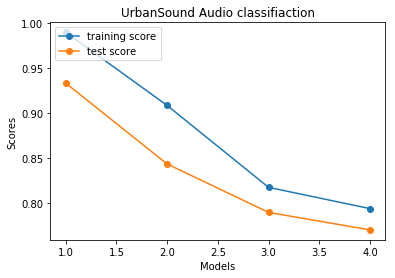

In [151]:
# Plot history: 
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4])
plt.plot(x,train_scores, '-o',label='training score')
plt.plot(x,test_scores, '-o',label='test score')
plt.title('UrbanSound Audio classifiaction')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.legend(loc="upper left")
plt.show()

From the above graph, we can arrange the accuracy in descending order:

- CNN
- CRNN
- Parallel CNN
- Parallel CNN

And also the difference between the training and testing accuracy decreases in the above given order (ie overfitting is reduced as we progress among the models)

## Training time comparison

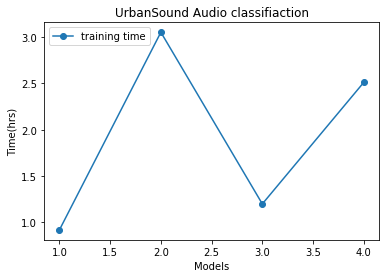

In [153]:
# Plot history: 
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4])
training_time = np.array([0.92, 3.05, 1.20, 2.51])
plt.plot(x,training_time, '-o',label='training time')
plt.title('UrbanSound Audio classifiaction')
plt.ylabel('Time(hrs)')
plt.xlabel('Models')
plt.legend(loc="upper left")
plt.show()

From the above graph, we can arrange the training time in descending order:
- CRNN
- Parallel CRNN
- Parallel CNN
- CNN

System specifications:

- Processor: 1.8 GHz Intel Core i5
- RAM Memory: 8 GB